In [36]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [37]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 6:3:1
df = pd.read_csv('/content/NKG-Historical-Data.csv', sep=",")
df=df['Price']

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df = df.str.replace(',', '').astype(float)


# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [38]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [39]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [40]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[5725.37229531 5709.38816411 5693.40403291 5677.41990171 5661.43577051
 5645.4516393  5629.4675081  5613.4833769  5597.4992457  5581.5151145
 5565.5309833  5549.5468521  5533.5627209  5517.5785897  5501.5944585
 5485.6103273  5469.6261961  5453.6420649  5437.6579337  5421.6738025
 5405.6896713  5389.7055401  5373.7214089  5357.7372777  5341.7531465
 5325.7690153  5309.78488409 5293.80075289 5277.81662169 5261.83249049]


In [41]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 2643.428681013923
Testing MAPE: 59.49143311328099
Testing MAE: 2484.38520195796


In [42]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[5725.37229531 5709.38816411 5693.40403291 5677.41990171 5661.43577051
 5645.4516393  5629.4675081  5613.4833769  5597.4992457  5581.5151145
 5565.5309833  5549.5468521  5533.5627209  5517.5785897  5501.5944585
 5485.6103273  5469.6261961  5453.6420649  5437.6579337  5421.6738025
 5405.6896713  5389.7055401  5373.7214089  5357.7372777  5341.7531465
 5325.7690153  5309.78488409 5293.80075289 5277.81662169 5261.83249049
 5245.84835929 5229.86422809 5213.88009689 5197.89596569 5181.91183449
 5165.92770329 5149.94357209 5133.95944089 5117.97530969 5101.99117849
 5086.00704729 5070.02291609 5054.03878489 5038.05465369 5022.07052249
 5006.08639129 4990.10226008 4974.11812888 4958.13399768 4942.14986648
 4926.16573528 4910.18160408 4894.19747288 4878.21334168 4862.22921048
 4846.24507928 4830.26094808 4814.27681688 4798.29268568 4782.30855448
 4766.32442328 4750.34029208 4734.35616088 4718.37202968 4702.38789848
 4686.40376728 4670.41963608 4654.

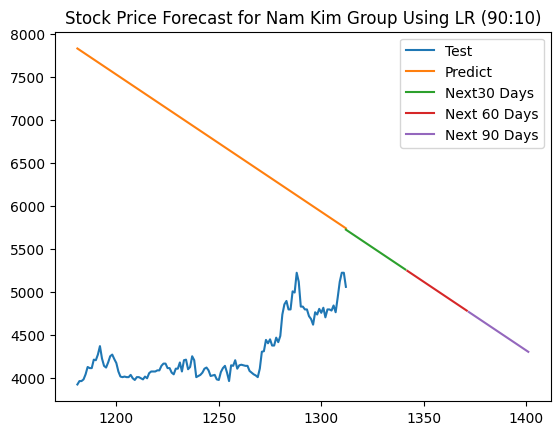

In [43]:
# 8.Vẽ hình
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(range(last_data.start, last_data.start + 30), y_next_90_days[:30])
plt.plot(range(last_data.start+30, last_data.start + 60), y_next_90_days[30:60])
plt.plot(range(last_data.start+60, last_data.start + 90), y_next_90_days[60:90])
plt.legend(['Test', 'Predict','Next30 Days', "Next 60 Days", "Next 90 Days"])
plt.title("Stock Price Forecast for Nam Kim Group Using LR (90:10)")
plt.show()

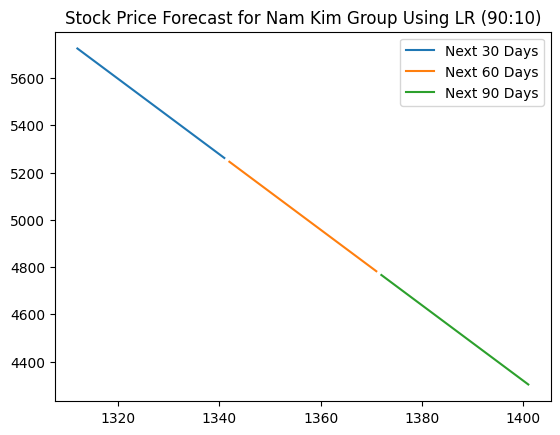

In [44]:
plt.plot(range(last_data.start, last_data.start + 30), y_next_90_days[:30])
plt.plot(range(last_data.start+30, last_data.start + 60), y_next_90_days[30:60]) # Slice y_next_90_days to match x-axis dimensions
plt.plot(range(last_data.start+60, last_data.start + 90), y_next_90_days[60:90])
plt.legend(["Next 30 Days", "Next 60 Days", "Next 90 Days"])
plt.title("Stock Price Forecast for Nam Kim Group Using LR (90:10)")
plt.show()